<a href="https://colab.research.google.com/github/Ayda2234/Crop_Pest_Classification_Using_DL/blob/main/py_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q tensorflow-datasets tensorflow
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import opendatasets as od
import os
import shutil
import torch.optim as optim
from torchvision import datasets, transforms, models

In [ ]:
od.download(
	"https://www.kaggle.com/datasets/rtlmhjbn/ip02-dataset/download?datasetVersionNumber=1")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading ip02-dataset.zip to ./ip02-dataset


100%|██████████| 2.94G/2.94G [01:39<00:00, 31.7MB/s]


In [ ]:
import os
import shutil
folders_list =["test","train","val"]
 #we will delete all folders we leave only 50 classes)
for folder in folders_list:
  for i in range( 50,102):
    folder_name = f"/content/ip02-dataset/classification/{folder}/{i}"    #/content/ip02-dataset/classification
    if os.path.exists(folder_name):

       shutil.rmtree(folder_name)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set random seeds for reproducibility
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Define data transformations
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))  #mitigate the impact of outliers
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))  # ImageNet normalization
])
# Load the IP102 dataset
train_dataset = datasets.ImageFolder('/content/ip02-dataset/classification/train', transform=train_transform)
val_dataset = datasets.ImageFolder('/content/ip02-dataset/classification/val', transform=val_transform)

# Define data loaders
batch_size = 32
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size)

model = models.shufflenet_v2_x1_0(pretrained=True)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ShuffleNet_V2_X1_0_Weights.IMAGENET1K_V1`. You can also use `weights=ShuffleNet_V2_X1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/shufflenetv2_x1-5666bf0f80.pth" to /root/.cache/torch/hub/checkpoints/shufflenetv2_x1-5666bf0f80.pth
100%|██████████| 8.79M/8.79M [00:00<00:00, 140MB/s]


In [ ]:
# Import ShuffleNet V2

PATH="/content/drive/MyDrive/pfe/lmkhayar.pth" #/content/drive/MyDrive/pfe/best_model.pth
model = torch.load(PATH)


# Modify the last fully connected layer for your classification task
num_classes = len(train_dataset.classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Move the model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Training loop
num_epochs = 20

for epoch in range(num_epochs):
    # Training phase
    model.train()
    train_loss = 0.0
    train_correct = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        train_correct += (predicted == labels).sum().item()

    train_loss /= len(train_dataset)
    train_accuracy = 100.0 * train_correct / len(train_dataset)

    # Validation phase
    model.eval()
    val_loss = 0.0
    val_correct = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            predictions.extend(predicted.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    val_loss /= len(val_dataset)
    val_accuracy = 100.0 * val_correct / len(val_dataset)

    # Print training/validation statistics
    print(f'Epoch {epoch+1}/{num_epochs} - '
          f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}% - '
          f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')

NameError: ignored

In [ ]:
torch.save(model,'/content/drive/MyDrive/pfe/t44.pth')

NameError: ignored

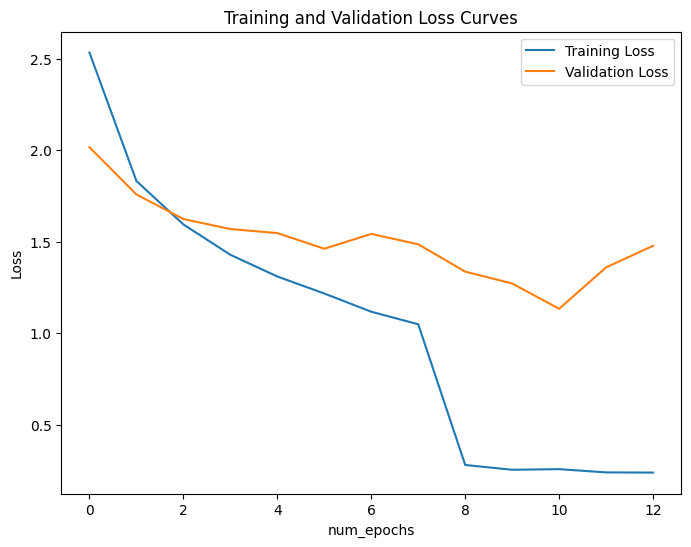

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have recorded the training and validation losses in separate lists or arrays
train_losses = [2.5329,1.8315,1.5942,1.4284,1.3099,1.2169,1.1175,]
val_losses = [2.0158,1.7580,1.6236,1.5691,1.5470,1.4614,1.5424,]

# Plotting the training and validation loss curves
plt.figure(figsize=(8, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('num_epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()


In [ ]:
torch.save(model,'/content/drive/MyDrive/pfe/lmkhayar.pth')

In [ ]:
transform_test = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
from torchvision.datasets import ImageFolder
test_loader = datasets.ImageFolder('/content/ip02-dataset/classification/test', transform=val_transform)
test_dataset = ImageFolder(root="/content/ip02-dataset/classification/test", transform=transform_test)

In [ ]:
# Set model to evaluation mode
model.eval()

# Initialize variables for evaluation metrics
total_samples = 0
correct_predictions = 0

# Iterate over the test dataset
for inputs, labels in test_dataset:
    # Preprocess the input if needed

    # Forward pass
    outputs = model(images)

    # Process the output and get predictions

    # Update evaluation metrics
    total_samples += images.size(0)
    correct_predictions += (predicted == labels).sum().item()

# Calculate accuracy
#accuracy = correct_predictions / total_samples
#train_loss /= len(train_dataset)
test_accuracy = 100.0 * train_correct / len(train_dataset)



# Print or use the evaluation results as needed
print(f'Test Accuracy: {test_accuracy :.2f}%')

Test Accuracy: 91.75%
